In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


In [2]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [3]:
test_group = pd.read_csv('/kaggle/input/ab-testing-dataset/test_group.csv', sep=';')
control_group = pd.read_csv('/kaggle/input/ab-testing-dataset/control_group.csv', sep=';')

# EDA

In [4]:
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_group.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [7]:
control_group.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


## Missing Values

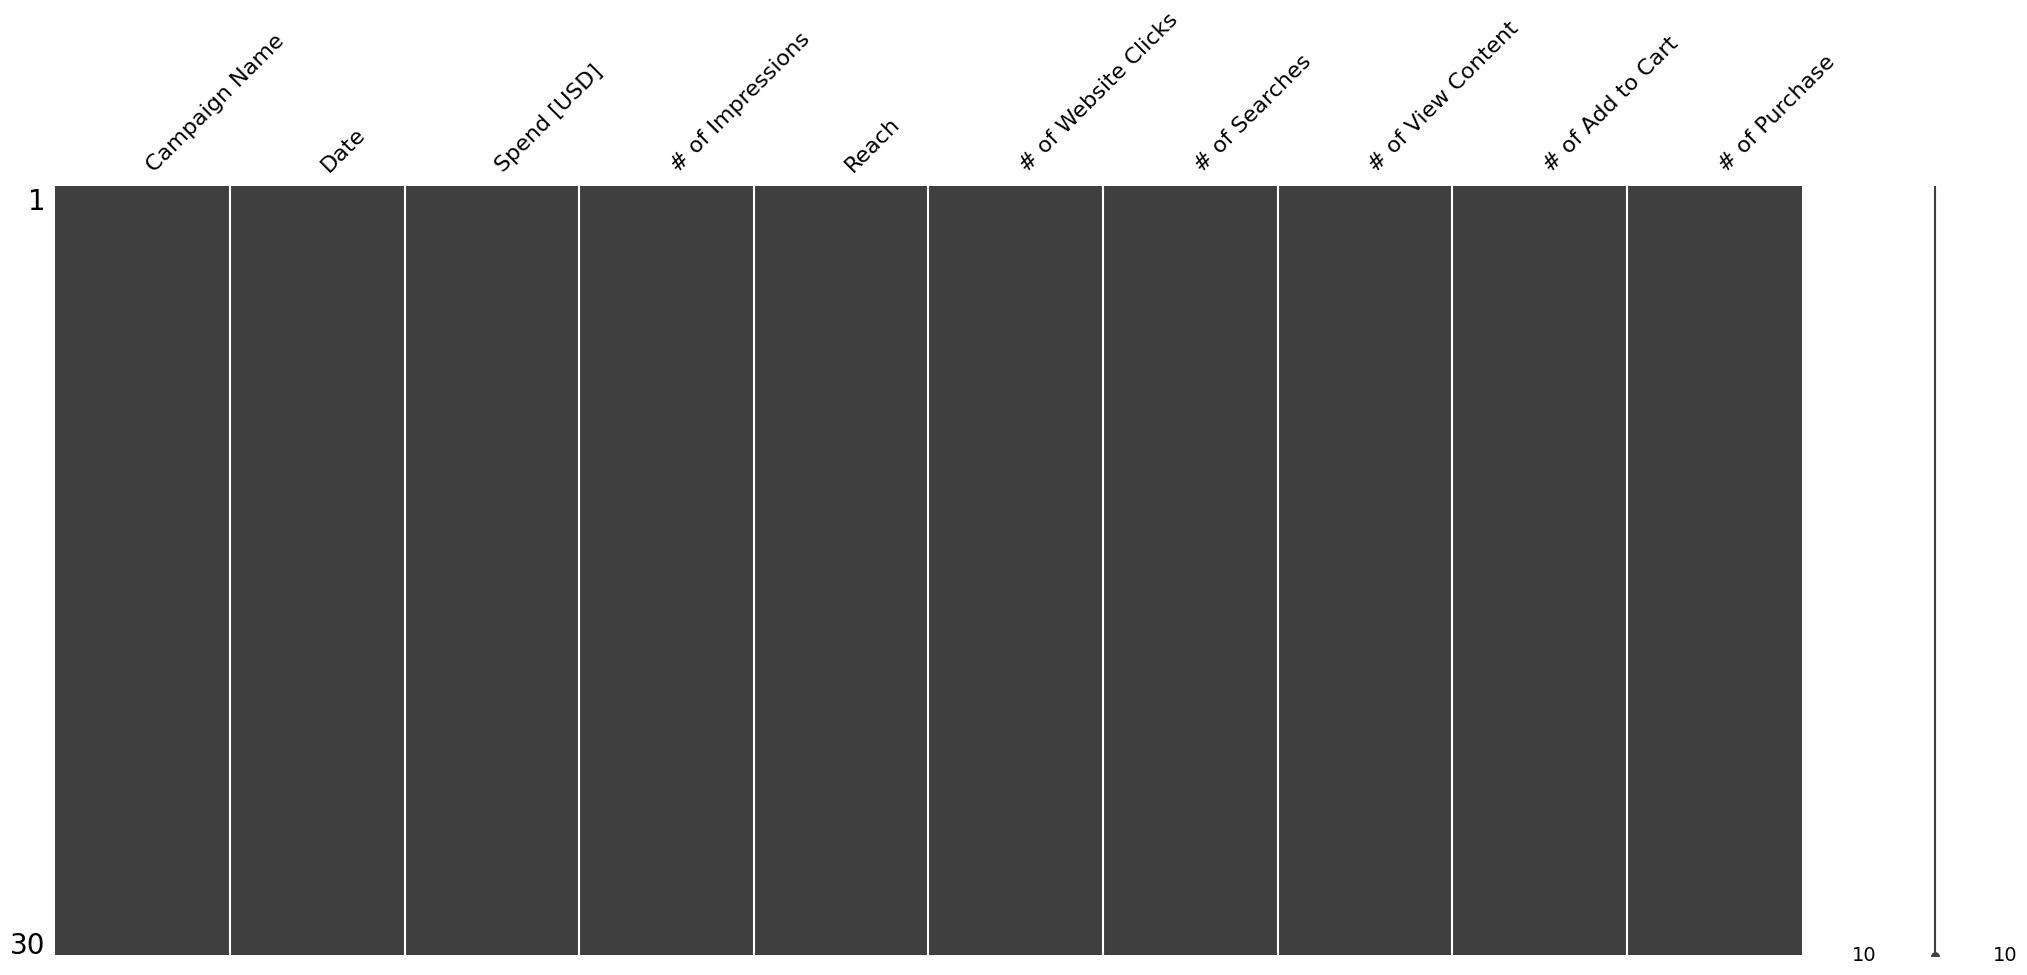

<Figure size 1500x900 with 0 Axes>

In [8]:
msno.matrix(test_group)
plt.figure(figsize = (15,9))
plt.show()

In [9]:
test_group.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


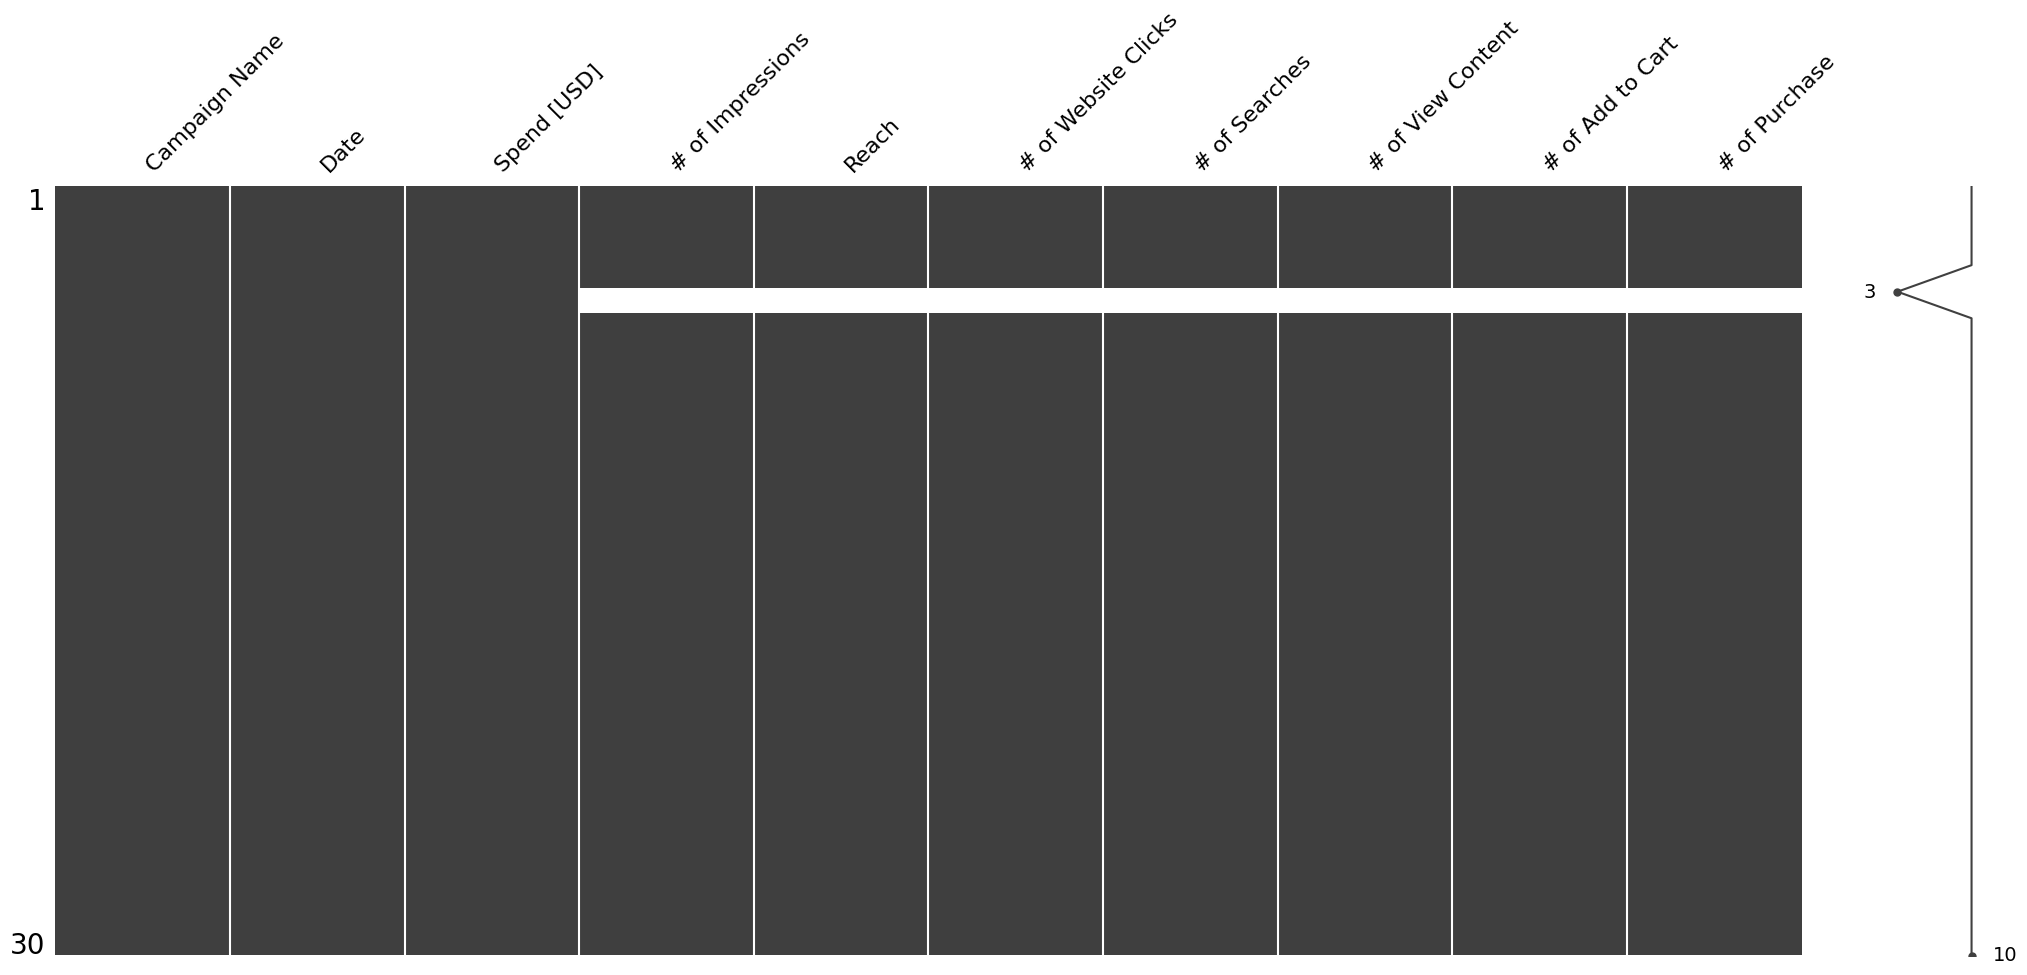

<Figure size 1500x900 with 0 Axes>

In [10]:
msno.matrix(control_group)
plt.figure(figsize = (15,9))
plt.show()

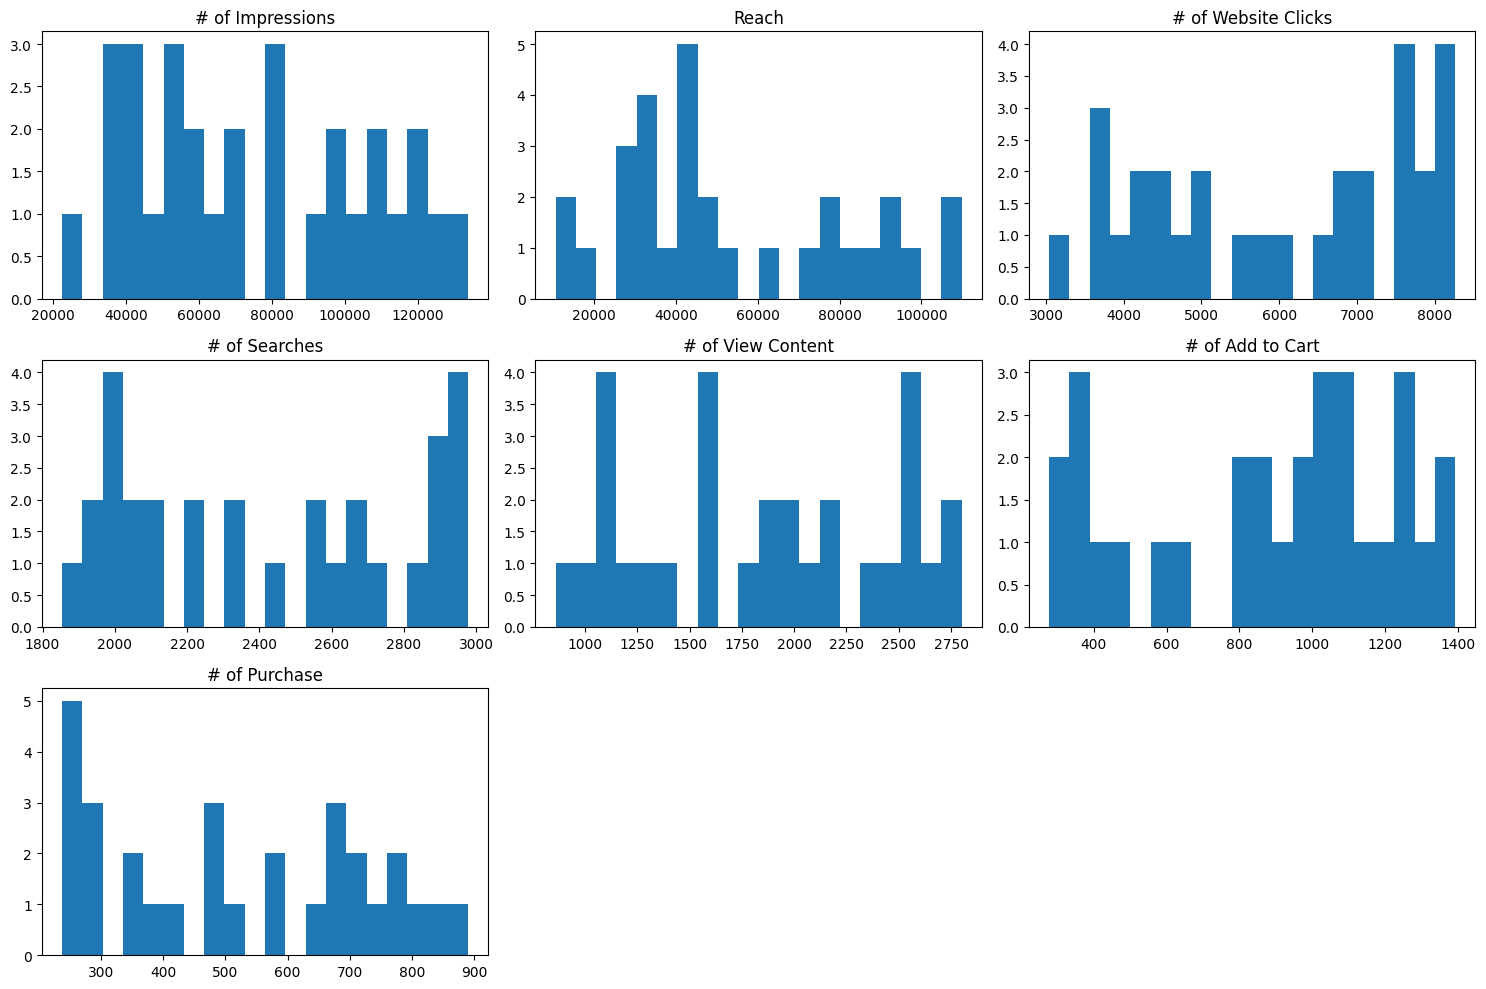

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Creating boxplots for each column
for i, column in enumerate(test_group.columns[3:]):
    axs[i//3, i%3].hist(test_group[column], bins=20)
    axs[i//3, i%3].set_title(f'{column}')

# Removing empty subplots
if len(test_group.columns) % 3 != 0:
    for j in range(i+1, 9):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [12]:
for column in control_group.columns[3:]:
    control_group[column].fillna(control_group[column].mean(), inplace=True)

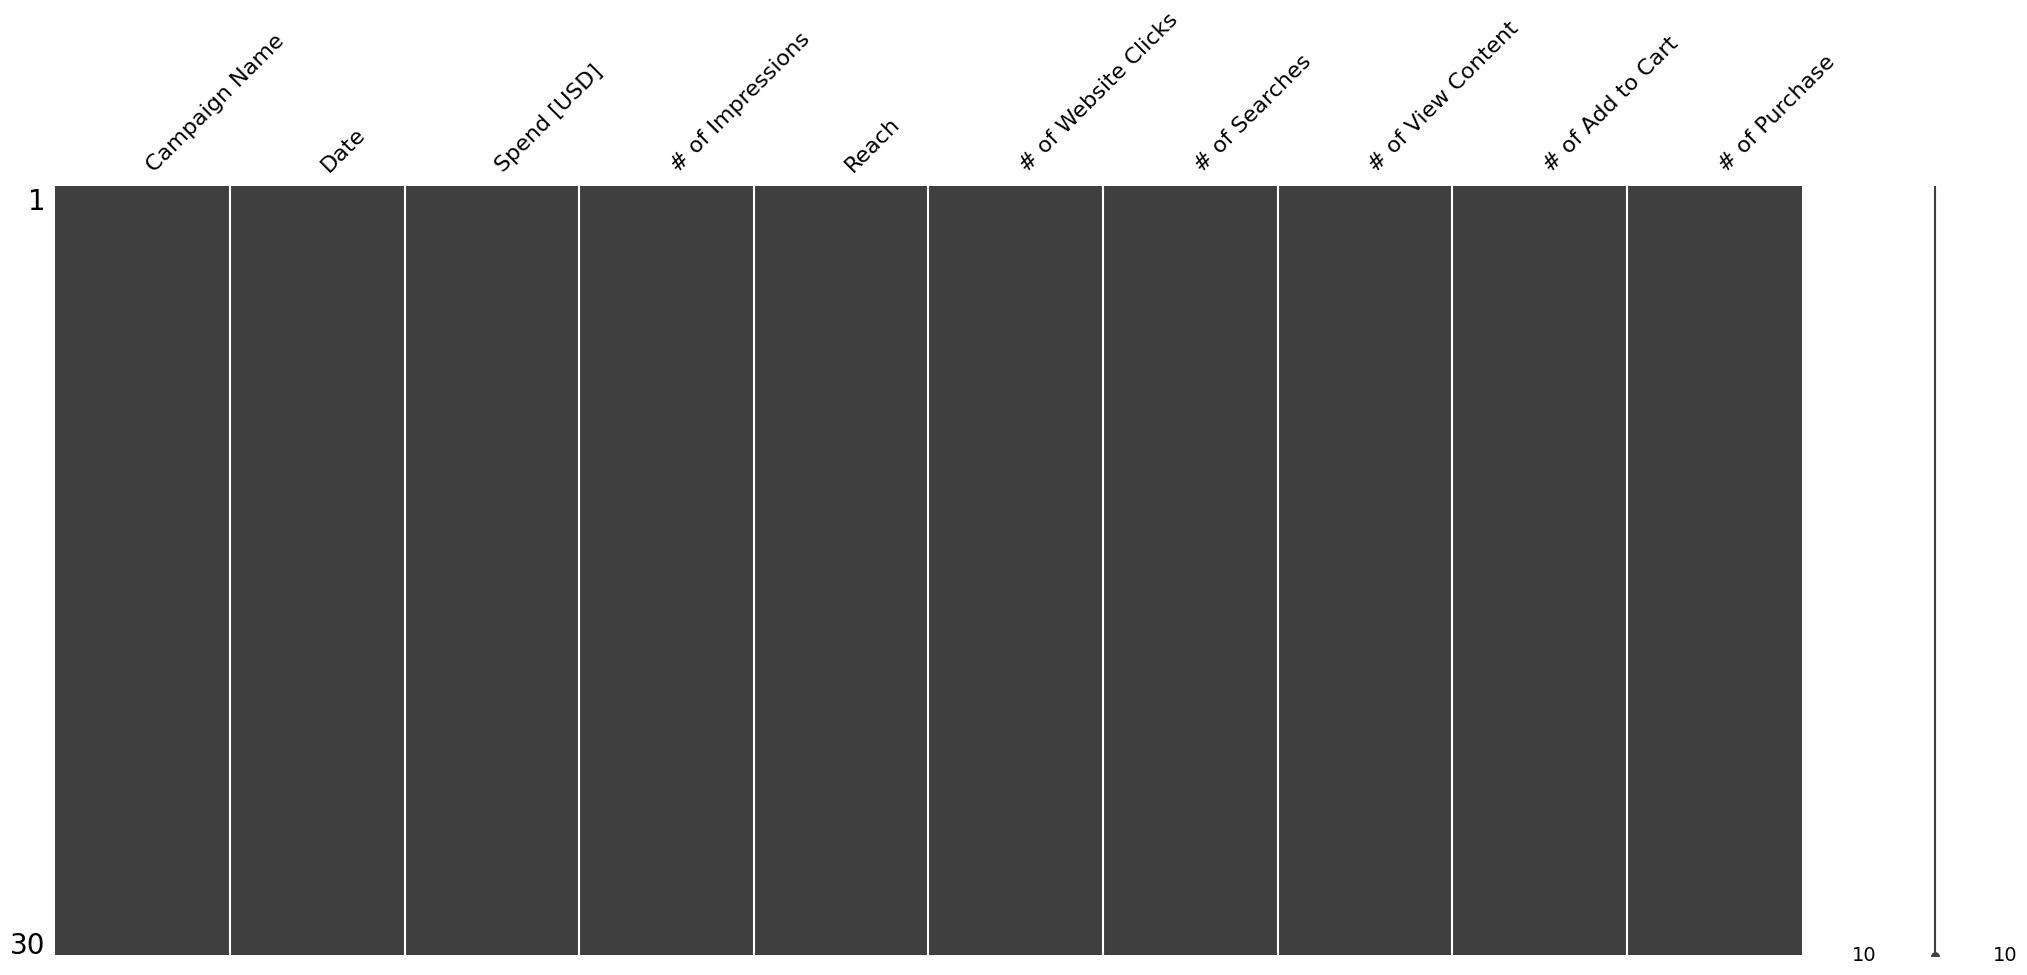

<Figure size 1500x900 with 0 Axes>

In [13]:
msno.matrix(control_group)
plt.figure(figsize = (15,9))
plt.show()

In [14]:
control_group.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [15]:
test_group.drop(['Campaign Name'], axis=1)

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [16]:
control_group.drop(['Campaign Name'], axis=1)

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,6.08.2019,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,7.08.2019,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,8.08.2019,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,9.08.2019,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


In [17]:
def extract_day(date_string):
        date_object = datetime.strptime(date_string, "%d.%m.%Y")
        return date_object.day

In [18]:
def plot_column(column, campaign1_dates, campaign1_reach, campaign2_dates, campaign2_reach):
    plt.figure(figsize=(10, 6))

    # Test group days
    test_days = campaign1_dates.apply(extract_day)
    
    # Control Group Days
    control_days = campaign2_dates.apply(extract_day)


    # Plot reach for campaign 1
    plt.plot(test_days, campaign1_reach, label='Campaign 1')

    # Plot reach for campaign 2
    plt.plot(control_days, campaign2_reach, label='Campaign 2')

    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Comparison of Campaign {column} Over Time')
    plt.legend()

    plt.show()

### Spend [USD]

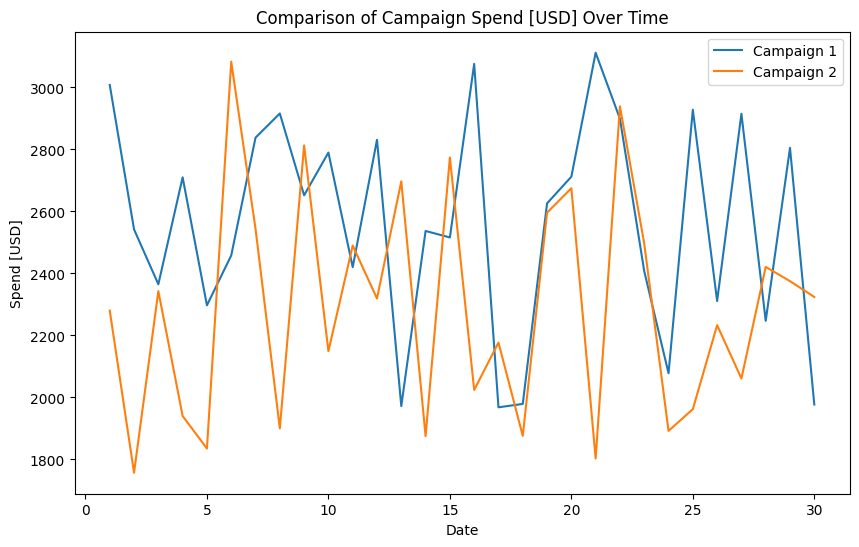

In [19]:
plot_column('Spend [USD]', test_group['Date'], test_group['Spend [USD]'], control_group['Date'], control_group['Spend [USD]'])

### Reach

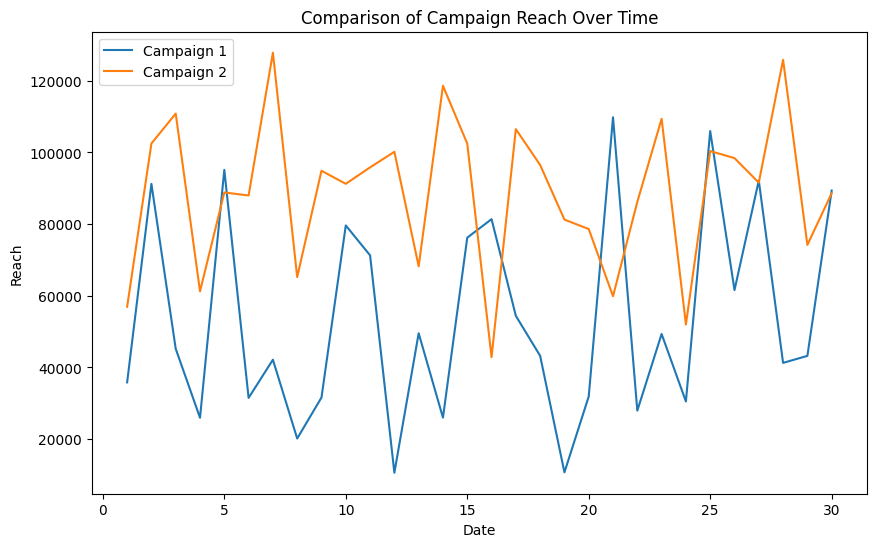

In [20]:
plot_column('Reach', test_group['Date'], test_group['Reach'], control_group['Date'], control_group['Reach'])

### Impressions

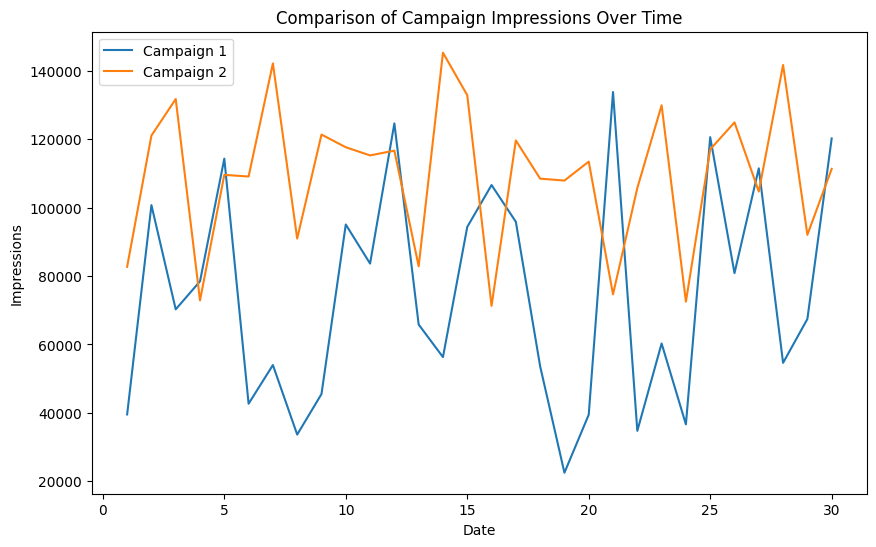

In [21]:
plot_column('Impressions', test_group['Date'], test_group['# of Impressions'], control_group['Date'], control_group['# of Impressions'])

### No.of Web Clicks

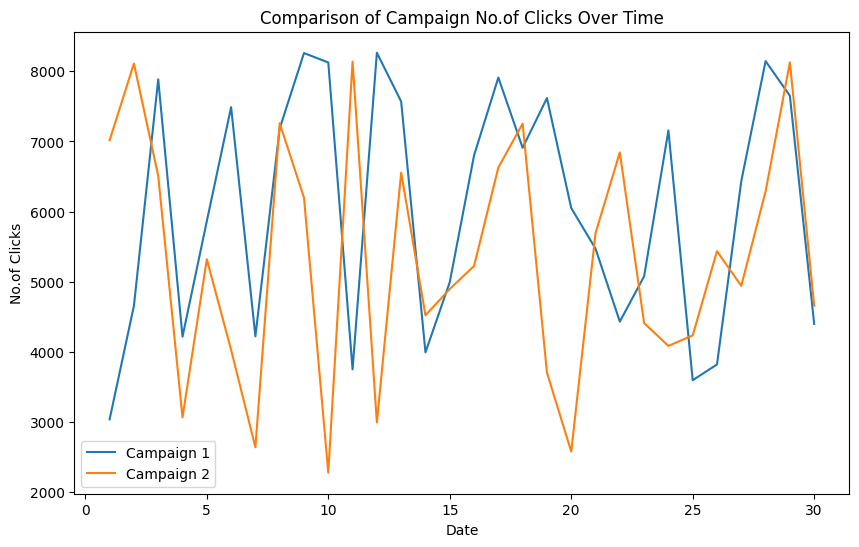

In [22]:
plot_column('No.of Clicks', test_group['Date'], test_group['# of Website Clicks'], control_group['Date'], control_group['# of Website Clicks'])

### No. of Searches

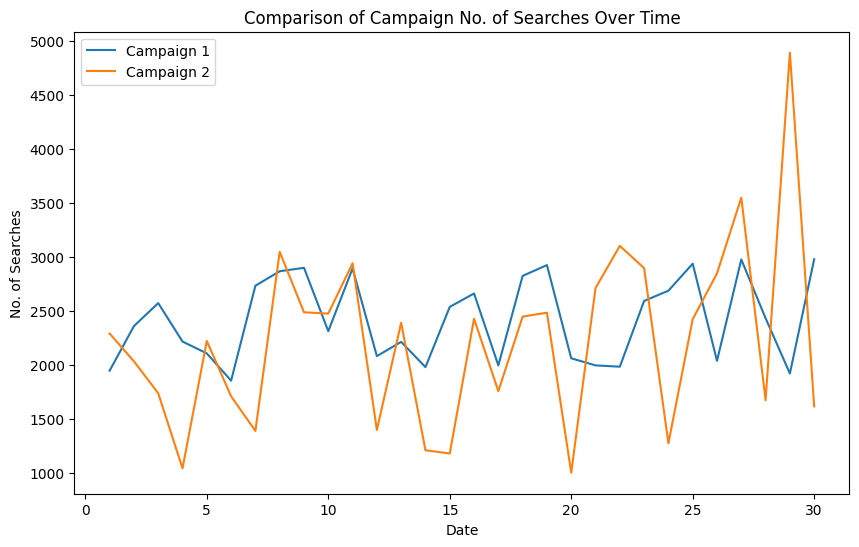

In [23]:
plot_column('No. of Searches', test_group['Date'], test_group['# of Searches'], control_group['Date'], control_group['# of Searches'])

### No. of View Content

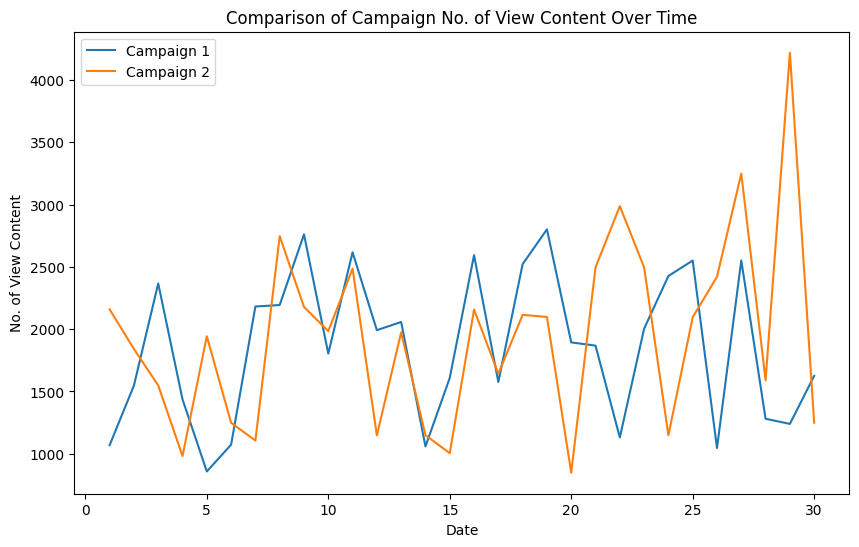

In [24]:
plot_column('No. of View Content', test_group['Date'], test_group['# of View Content'], control_group['Date'], control_group['# of View Content'])

### No. of Add to Cart

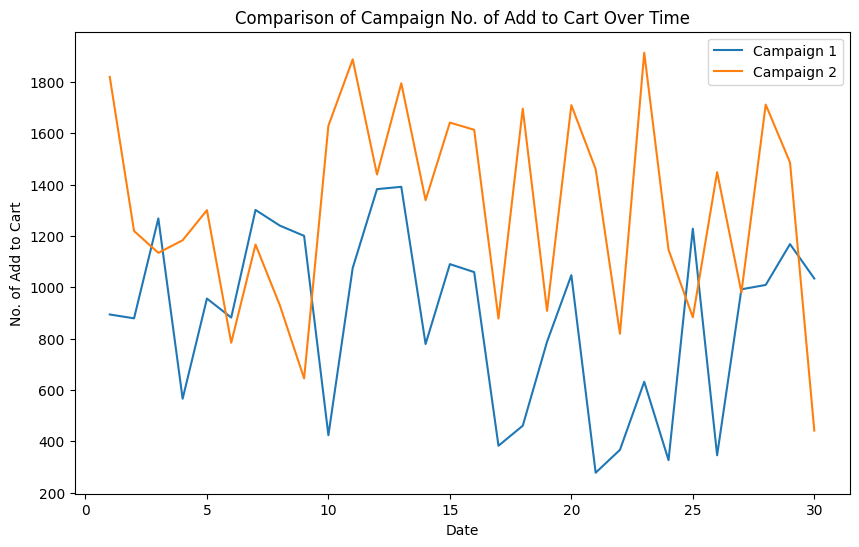

In [25]:
plot_column('No. of Add to Cart', test_group['Date'], test_group['# of Add to Cart'], control_group['Date'], control_group['# of Add to Cart'])

### No. of Purchase

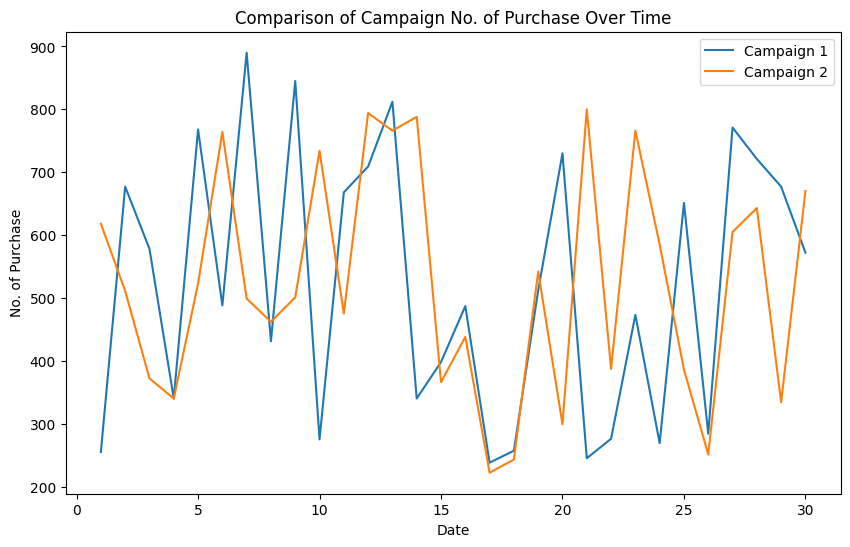

In [26]:
plot_column('No. of Purchase', test_group['Date'], test_group['# of Purchase'], control_group['Date'], control_group['# of Purchase'])

### P-Value

In [27]:
t_stat, p_val = stats.ttest_ind(control_group['# of Purchase'], test_group['# of Purchase'])
print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 0.03066909523750146
p-value: 0.9756387309702421


# Interprete Results 

* The first campaign seems to be more effective at driving users to click on the content, which could indicate that the content is engaging or that the call-to-action is compelling.

* The second campaign appears to have a wider reach (more unique users saw the content), generated more impressions (the content was displayed more times), and led to more add to cart actions. This could suggest that while the second campaign might not have prompted as many immediate clicks, it was successful in reaching a larger audience and moving users further along the conversion funnel (as indicated by the add to cart actions).
 
**P-Value** </br>
The P-value of .97 is quite high. In statistical hypothesis testing, a P-value is used to determine the significance of results. A common threshold for significance is 0.05. If the P-value is less than 0.05, the results are generally considered statistically significant. If the P-value is greater than 0.05, the results are not considered statistically significant.

* In this case, a P-value of .97 suggests that any differences you’re seeing between the two campaigns could very well be due to chance rather than a meaningful difference in performance. 

### Cost per Click

In [28]:
test_cost_click = test_group['Spend [USD]'].sum() / test_group['# of Website Clicks'].sum()
control_cost_click = control_group['Spend [USD]'].sum() / control_group['# of Website Clicks'].sum()

if test_cost_click < control_cost_click:
    print("Test Group has a lower cost per click.")
elif test_cost_click > control_cost_click:
    print("Control Group has a lower cost per click.")
else:
    print("Both groups have the same cost per click.")

Test Group has a lower cost per click.


# Interprete Results 

The test group, despite having a lower number of clicks, appears to be more cost-effective. It reached a larger audience, generated more impressions, and led to more add to cart actions, all while maintaining a lower cost per click. This suggests that the second campaign was successful in not only reaching a larger audience but also moving users further along the conversion funnel in a more cost-effective manner. Therefore, even though the first campaign had more web clicks, the second campaign might provide a better return on investment considering its wider reach, higher engagement (as indicated by add to cart actions), and lower cost per click. However, the specific goals of your campaigns and other factors such as the quality of clicks or conversions should also be considered when evaluating campaign performance.